# Astronomy 406 "Computational Astrophysics" (Fall 2024)

# Project 2

### Background

In this project we explore different ways to represent and visualize univariable data. For a given data set $x_i$ of N points, an alternative to a dicrete, rectangular histogram is a continuous function called the [Kernel Density Estimator](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE):

$$ f(x) = {1\over N} \sum_i {1\over h_i} K{\left(\frac{x-x_i}{h_i}\right)} $$

where $K(u)$ is the kernel function, and $h$ is the bandwidth. It is normalized as $\int_{-\infty}^{\infty} K(u) du = 1$.

The bandwidth can be different for each data point $i$, but more commonly it is taken as a constant $h$. In the limit $h \rightarrow 0$, the kernel becomes a [$\delta$-function](https://en.wikipedia.org/wiki/Dirac_delta_function). There are many examples of the [kernel function](https://en.wikipedia.org/wiki/Kernel_(statistics)#Kernel_functions_in_common_use). We will use the following three:

__Gaussian kernel__
$$ K_{G}\, (u) = {1\over \sqrt{2\pi}} e^{-u^2\,/2} $$

__top-hat kernel__
$$ K_{h}\, (u) = \frac{1}{2}, \quad\mathrm{if}\quad |u| \le 1 $$

$$ K_{h}\, (u) = 0, \quad\mathrm{if}\quad |u| > 1 $$

and __Epanechnikov kernel__
$$ K_{E}\, (u) = \frac{3}{4} (1-u^2), \quad\mathrm{if}\quad |u| \le 1 $$

$$ K_{E}\, (u) = 0, \quad\mathrm{if}\quad |u| > 1. $$


### Learning goals

* Compare different ways of creating a histogram


* Understand the effects of various histogram methods on the visual impression of a given data set


* Determine the best method for visualizing a data set to reveal its underlying distribution function

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('mplstyle.txt')
from scipy import stats

In [2]:
# load in metallicity dataset
feh, delta_feh = np.loadtxt('gc_feh.dat', unpack=True)

# Part 1

1. File __gc_feh.dat__ in `Canvas/Files/Data` contains two columns: metallicity of globular clusters [Fe/H] and its estimated measurement error $\delta$[Fe/H]. Use a simple matplotlib histogram to plot a sequence of histograms of [Fe/H] with a specified bin size of 0.05, 0.1, 0.25, 0.5, and 1. Take the X-axis range from -3 to 1. Comment on how the visual appearance of the distribution changes as you vary the bin size (how many peaks you see, how distinct they appear, how many groupings of points would you identify?).<br>

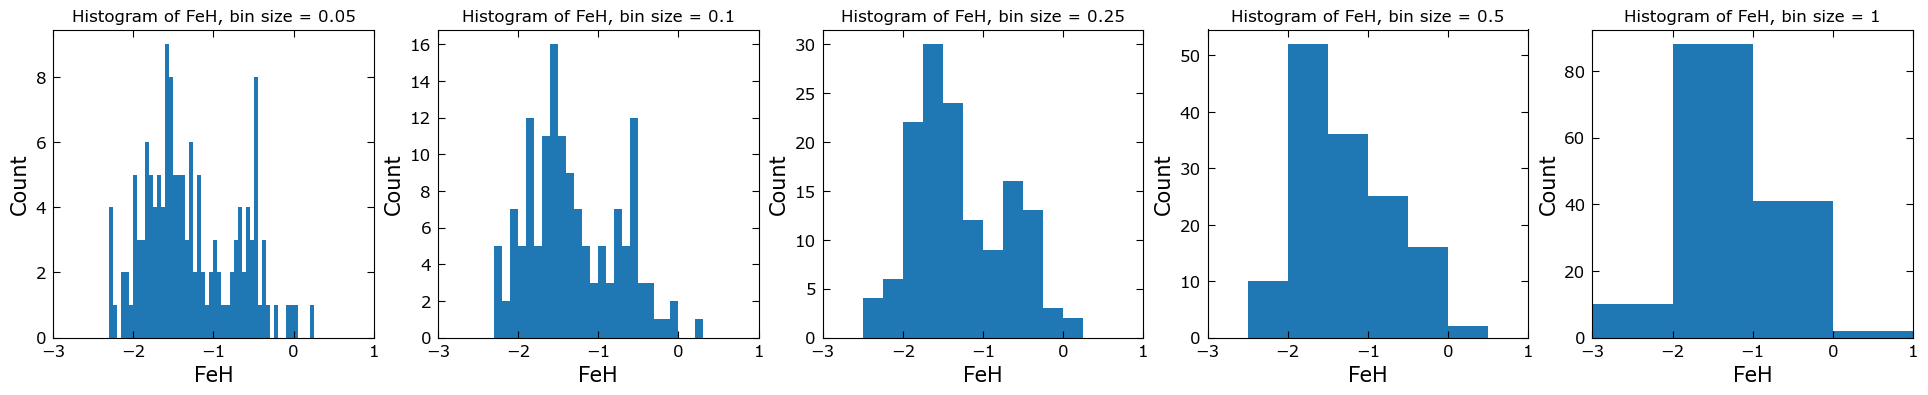

In [3]:
bin_sizes = [0.05, 0.1, 0.25, 0.5, 1]
fig, axs = plt.subplots(1, len(bin_sizes), figsize=(24, 4), sharey=False)
ax = 0

for bin_size in bin_sizes:
    axs[ax].hist(feh, bins=np.arange(-3, 1 + bin_size, bin_size))
    axs[ax].set_xlabel('FeH')
    axs[ax].set_ylabel('Count')
    axs[ax].set_title('Histogram of FeH, bin size = ' + str(bin_size))
    axs[ax].set_xlim(-3, 1)
    ax += 1

Because the bin sizes are larger, more data points get included per bin. This changes how many peaks/groupings can be identified. For example, with the largest bin size of 1, there are only 4 bins, and it looks like there is only one peak near the mean/median. However, at a bin size of 0.25 and smaller, it looks like there are two groups/populations. At the the bin size of 0.25, those two populations are the most distinctly/clearly seen.

# Part 2

2. Try different "rules" for choosing the number of bins provided by the __astropy__ library: _Scott's_, _Freedman_, _Knuth's_, _Bayesian Blocks_. Comment on their visual differences with the simple histograms above.<br>

In [4]:
from astropy.visualization import hist

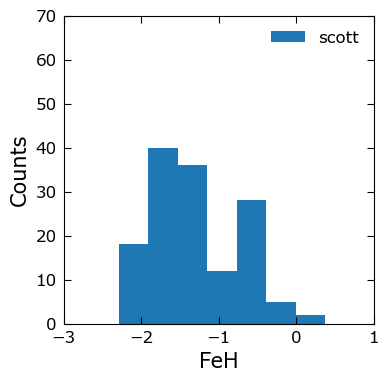

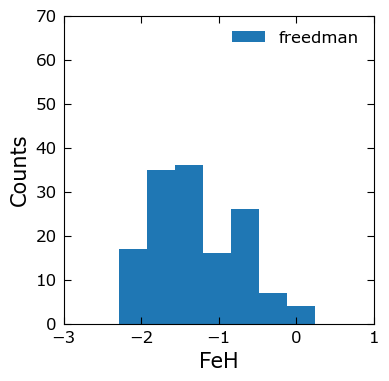

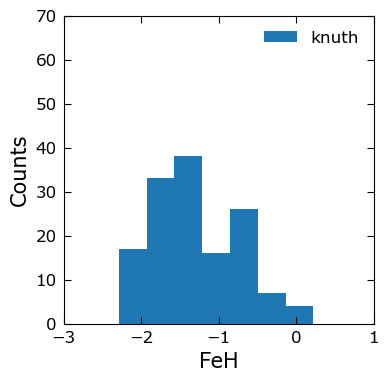

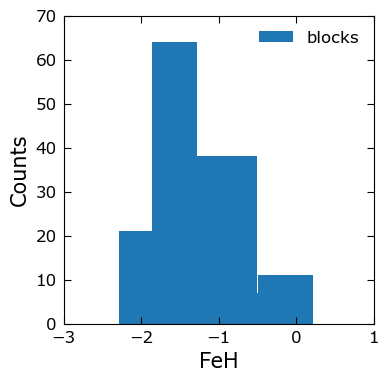

In [5]:
bin_methods = ['scott', 'freedman', 'knuth', 'blocks']

for bin_method in bin_methods:
    plt.figure(figsize=(4, 4))

    hist(feh, bin_method, alpha=1.0, label=bin_method)
    plt.legend()
    plt.xlabel('FeH')
    plt.ylabel('Counts')
    plt.xlim(-3, 1)
    plt.ylim(0, 70)

The Bayesian blocks method appears the most like a binsize of 1 from part 1, looking just like one group. The other methods however, (Scott's, Freedman, Knuth) have small enough bin sizes to reveal the two populations.

# Part 3

3. We can do a more sophisticated way of constructing a histogram, called _adaptive histogram_. Write a KDE function $f(x)$ with a __top-hat__ kernel defined above, using a fixed bandwidth $h=0.2$. Calculate and plot this KDE function $f(x)$ vs. $x$, for a finely-spaced range of $x$ between -3 and 1. Experiment with increasing the number of points $x$ in `np.linspace` (spacing should be much smaller than $h$). Above some number of points, the distribution should stop changing.<br>

Spacing: 0.00571429


Text(0.5, 1.0, 'Adaptive Histogram with Top-Hat Kernel')

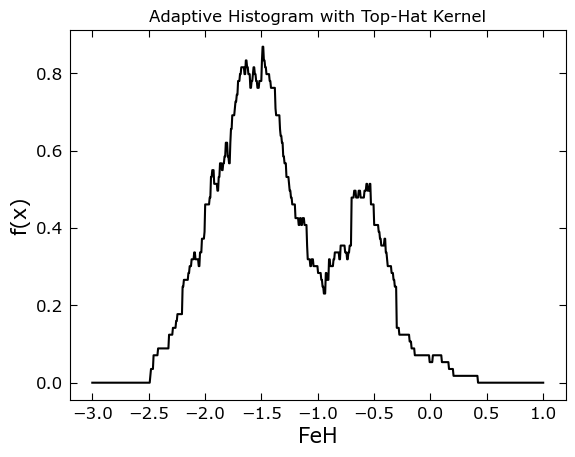

In [6]:
def K_tophat(u):
    if abs(u) <= 1.0:
        return .5
    else:
        return 0

def KDE(x):
    sum = 0
    N = len(feh) 
    # sum over all data points
    for i in range(len(feh)):
        sum += (K_tophat((x - feh[i]) / h) / h)
    return sum / N

x_list = []
y_list = []
h = 0.2
num_points = 7e2
print('Spacing:', round((1 - -3) / num_points, 8))

# loop over range of Fe/H from -3 to 1
for x in np.linspace(-3, 1, int(num_points)):
    x_list.append(x)
    y_list.append(KDE(x))

plt.plot(x_list, y_list, color='k')
plt.xlabel('FeH')
plt.ylabel('f(x)')
plt.title('Adaptive Histogram with Top-Hat Kernel')

It seems that the distribution stops changing when spacing $\lesssim$ 0.003 .

# Part 4

4. Now repeat step 3 for a __Gaussian kernel__ instead of a top-hat, with the same $h$. Then experiment with varying $h$ by a factor of several, larger and smaller, and comment on how it affects the appearance of the distribution.<br>

__Gaussian kernel__
$$ K_{G}\, (u) = {1\over \sqrt{2\pi}} e^{-u^2\,/2} $$

Spacing: 0.004


Text(0.5, 1.0, 'Adaptive Histogram with Gaussian Kernel')

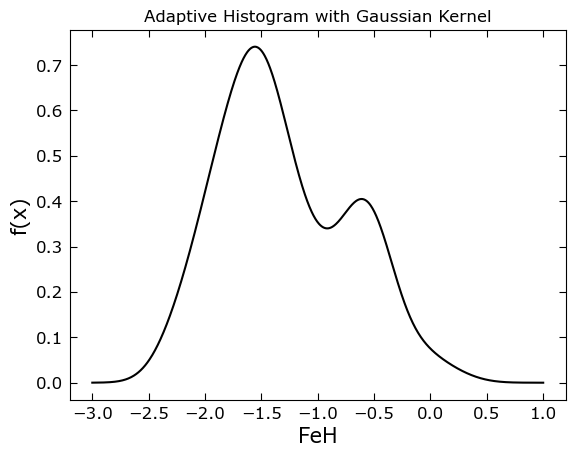

In [7]:
# gaussian kernel definition
def K_gaussian(u):
    return (2 * np.pi) ** (-1/2) * np.exp(-.5 * u ** 2)

def KDE(x):
    sum = 0
    N = len(feh) 

    # sum over all data points
    for i in range(len(feh)):
        sum += (K_gaussian((x - feh[i]) / h) / h)
    return sum / N

x_list = []
y_list = []
h = 0.2
num_points = 1000
print('Spacing:', round((1 - -3) / num_points, 8))

# loop over range of Fe/H from -3 to 1
for x in np.linspace(-3, 1, int(num_points)):
    x_list.append(x)
    y_list.append(KDE(x))

plt.plot(x_list, y_list, color='k')
plt.xlabel('FeH')
plt.ylabel('f(x)')
plt.title('Adaptive Histogram with Gaussian Kernel')

The distribution appears to stop changing for spacings $\lesssim 0.025$. And for spacing larger than this the general shape of the distribution is similar, but less smooth.

# Part 5

5. An estimate for the optimal bandwidth of the Gaussian kernel is given by [Silverman's rule of thumb](https://en.wikipedia.org/wiki/Kernel_density_estimation#A_rule-of-thumb_bandwidth_estimator):

$$ h_o \approx 0.9 \min\left(\sigma, \frac{IQR}{1.34}\right) \; N^{-1/5} $$

where $\sigma$ is the standard deviation of the dataset, and IQR is the [interquartile range](https://en.wikipedia.org/wiki/Interquartile_range) (75% percentile minus 25% percentile). Choose the smaller of the two and divide by the 1/5 power of the size of the dataset $N$. Make a plot of the Gaussian kernel with $h_o$. Does it look better than other choices of $h$?<br>

h_0: 0.1893


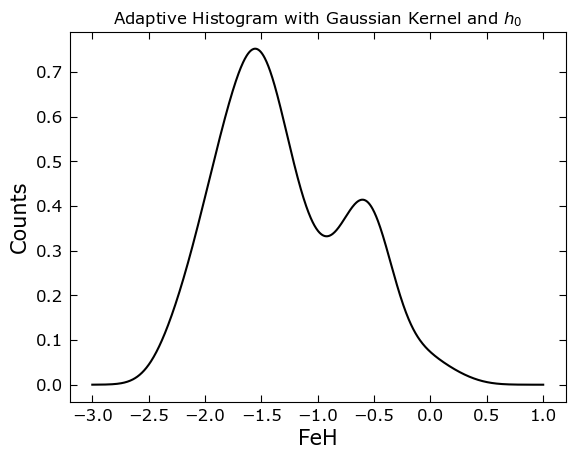

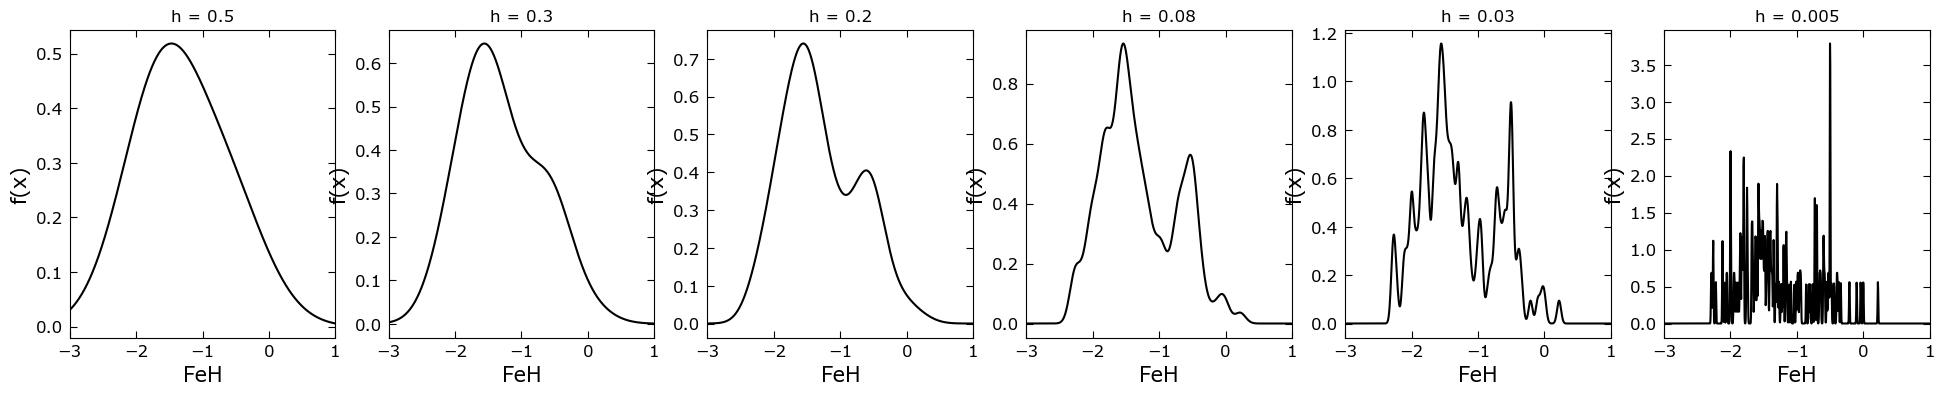

In [8]:
import pandas as pd
percentile25 = pd.Series(feh).quantile(0.25)
percentile75 = pd.Series(feh).quantile(0.75)
IQR = percentile75 - percentile25
sigma = np.std(feh)

h_0 = 0.9 * np.min([IQR / 1.34, sigma]) * len(feh) ** (-1/5)
print('h_0:', round(h_0, 4))

def KDE_h(x, h):
    sum = 0
    N = len(feh) 
    for i in range(len(feh)):
        sum += (K_gaussian((x - feh[i]) / h) / h)
    return sum / N

x_list = []
y_list = []
num_points = 1000

# loop over range of Fe/H from -3 to 1
for x in np.linspace(-3, 1, int(num_points)):
    x_list.append(x)
    y_list.append(KDE_h(x, h_0))

plt.plot(x_list, y_list, color='k')
plt.xlabel('FeH')
plt.ylabel('Counts')
plt.title('Adaptive Histogram with Gaussian Kernel and $h_0$')

h_values = [0.5, 0.3, 0.2, 0.08, 0.03, 0.005] #np.linspace(1, 1e-2, 5) #[2.0, 0.2, 0.02, 0.002]
fig, axs = plt.subplots(1, len(h_values), figsize=(24, 4), sharey=False)
ax = 0

for h in h_values:
    x_list = []
    y_list = []
    num_points = 1000

    for x in np.linspace(-3, 1, int(num_points)):
        x_list.append(x)
        y_list.append(KDE_h(x, h))

    axs[ax].plot(x_list, y_list, color='k')
    axs[ax].set_xlabel('FeH')
    axs[ax].set_ylabel('f(x)')
    axs[ax].set_title('h = ' + str(h))
    axs[ax].set_xlim(-3, 1)
    ax += 1

Looking at the histograms above, $h_{0} \sim 0.2$, and in that histogram it is very clear there is a bimodal distribution, with the lower value population being more prevalent in our dataset. At higher values of h (e.g. 0.5), the bimodal distribution is lost, and at much smaller values of h (e.g. 0.005), there are so many individual bins that it is hard to make a general observation about the distribution. So I think Silverman's rule of thumb is a pretty good estimate of what h to use.

# Part 6

6. Now use an __Epanechnikov kernel__, varying $h$ by a factor of several, larger and smaller, and comment on how it affects the appearance of the plot. Does Silverman's rule work well for this kernel?<br>


and __Epanechnikov kernel__
$$ K_{E}\, (u) = \frac{3}{4} (1-u^2), \quad\mathrm{if}\quad |u| \le 1 $$

$$ K_{E}\, (u) = 0, \quad\mathrm{if}\quad |u| > 1. $$

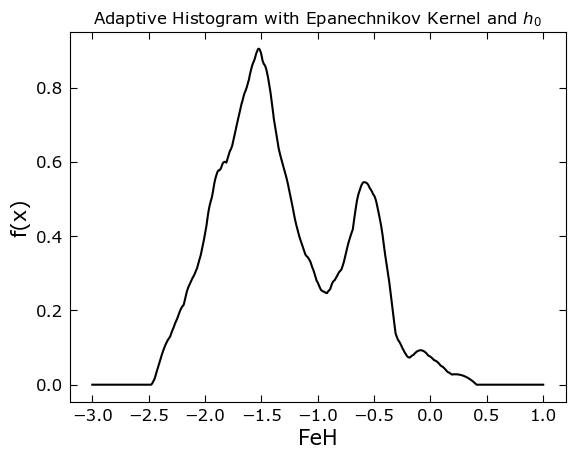

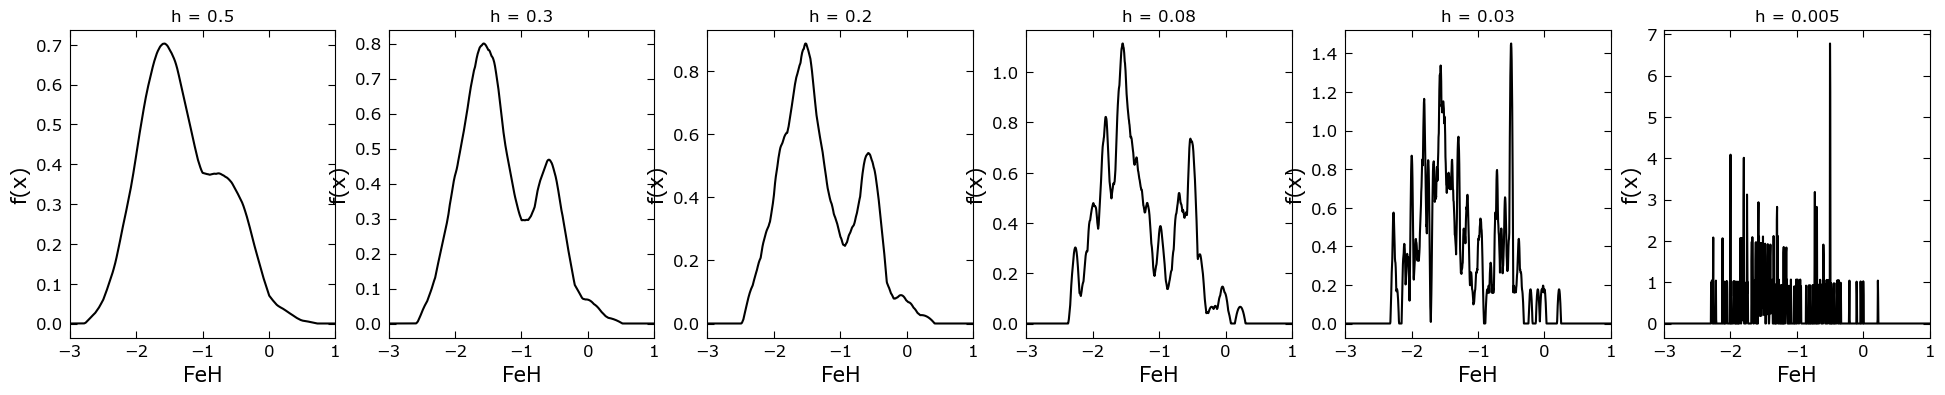

In [9]:
# define Epanechnikov kernel
def K_Epan(u):
    if abs(u) <= 1:
        return .75 * (1 - u ** 2)
    else:
        return 0

def KDE_Epan_h(x, h):
    sum = 0
    N = len(feh) 
    # sum over all data points
    for i in range(len(feh)):
        sum += (K_Epan((x - feh[i]) / h) / h)
    return sum / N

x_list = []
y_list = []
num_points = 1000

# loop over range of Fe/H from -3 to 1
for x in np.linspace(-3, 1, int(num_points)):
    x_list.append(x)
    y_list.append(KDE_Epan_h(x, h_0))

plt.plot(x_list, y_list, color='k')
plt.xlabel('FeH')
plt.ylabel('f(x)')
plt.title('Adaptive Histogram with Epanechnikov Kernel and $h_0$')

h_values = [0.5, 0.3, 0.2, 0.08, 0.03, 0.005]
fig, axs = plt.subplots(1, len(h_values), figsize=(24, 4), sharey=False)
ax = 0

for h in h_values:
    x_list = []
    y_list = []
    num_points = 1000

    for x in np.linspace(-3, 1, int(num_points)):
        x_list.append(x)
        y_list.append(KDE_Epan_h(x, h))

    axs[ax].plot(x_list, y_list, color='k')
    axs[ax].set_xlabel('FeH')
    axs[ax].set_ylabel('f(x)')
    axs[ax].set_title('h = ' + str(h))
    axs[ax].set_xlim(-3, 1)
    ax += 1

As h changes, we see the same types of changes as we did in part 5. For example, at small values of h, there are so many individual peaks which makes it hard to analyze. Whereas at large values of h, the two groups are harder to see. I think Silverman's rule works pretty well with this kernel as well, both populations are clear.

# Part 7

7. In all the cases above we used a constant bandwidth $h$. When we have estimates of measurement errors $h_i$, we can represent different data points with kernels of their individual $h_i$, as in the first equation above. Re-write your KDE function to use an input array of $h_i$ instead of a constant $h$. Plot the KDE with the Epanechnikov kernel and the measured errors $\delta$[Fe/H].<br>

$$ f(x) = {1\over N} \sum_i {1\over h_i} K{\left(\frac{x-x_i}{h_i}\right)} $$

Text(0.5, 1.0, 'Epanechnikov Kernel and $\\delta$(Fe/H) as $h$')

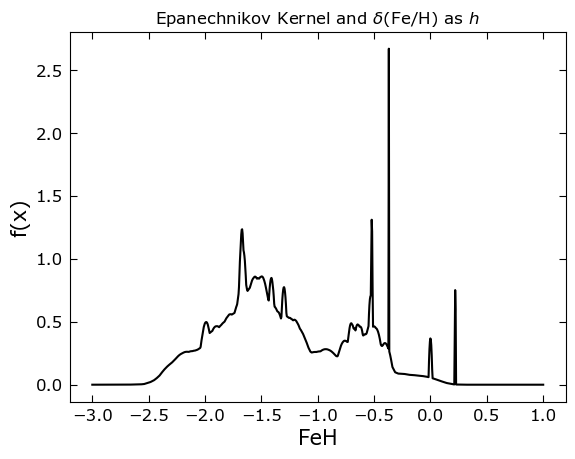

In [10]:
def KDE_Epan(x):
    sum = 0
    N = len(feh) 
    # sum over all data points
    for i in range(len(feh)):
        sum += (K_Epan((x - feh[i]) / delta_feh[i]) / delta_feh[i])
    return sum / N

x_list = []
y_list = []
num_points = 1000

# loop over range of Fe/H from -3 to 1
for x in np.linspace(-3, 1, int(num_points)):
    x_list.append(x)
    y_list.append(KDE_Epan(x))

plt.plot(x_list, y_list, color='k')
plt.xlabel('FeH')
plt.ylabel('f(x)')
plt.title('Epanechnikov Kernel and $\delta$(Fe/H) as $h$')

# Part 8

8. In the previous plot, points with very small values of $\delta$[Fe/H] may appear as sharp spikes and you may wish to smooth them. A simple way to do it is to impose a user-defined minimum value $h_{min}\,$ and increase all $h_i < h_{min}\,$ to match $h_{min}\,$, while keeping the larger values of $h_i$ unchanged. Modify your KDE function to accept an additional argument $h_{min}\,$ and plot the KDE with the Epanechnikov kernel and $h_{min} =0.1$. Does it help to produce a smoother distribution?<br>

Text(0.5, 1.0, 'Epanechnikov Kernel and $\\delta$(Fe/H) as $h$')

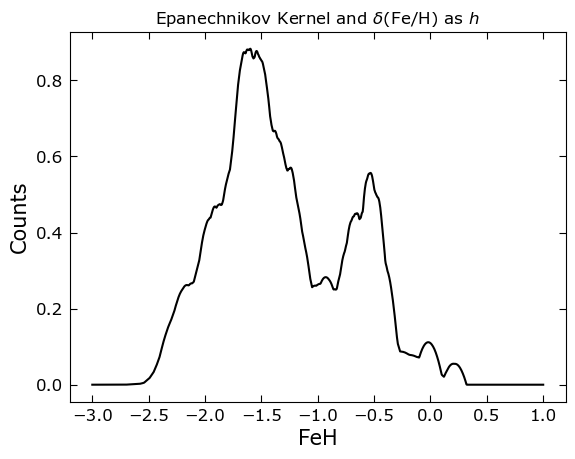

In [11]:
h_min = 0.1

def KDE_Epan(x, h_min):
    sum = 0
    N = len(feh)
    for i in range(len(feh)):
        # determine if h_min needed or not
        if delta_feh[i] < h_min:
            h = h_min
        else:
            h = delta_feh[i]
            # then sum over all data points
        sum += (K_Epan((x - feh[i]) / h) / h)
    return sum / N

x_list = []
y_list = []
num_points = 1000

# loop over range of Fe/H from -3 to 1
for x in np.linspace(-3, 1, int(num_points)):
    x_list.append(x)
    y_list.append(KDE_Epan(x, 0.1))

plt.plot(x_list, y_list, color='k')
plt.xlabel('FeH')
plt.ylabel('Counts')
plt.title('Epanechnikov Kernel and $\delta$(Fe/H) as $h$')

Yes, adding a minimum h value produced a smoother distribution function

# Part 9

9. Final assessment of how different ways of plotting histograms affects your perception of features of the dataset.<br><br>

* One of the things that affected how the distribution function looked was what h was used in the KDE equation. For example, if we used just one h value for all data points the error was essentially assumed to be the same for each data point. This made these plots weight points differently, which might make the plot more accurate. 

* If we manually set h for all data points, incerasing h made the distribution functions smoother, and decreasing it made them less smooth. This is helpful if you want to manually force a certain smoothness.

* The three kernels we used in this project led to different looking plots. The top-hat kernel made the distribution function quite jagged, and not smooth. The gaussian kernel, on the other hand, made a very smooth looking plot. Finally, the Epanechnikov kernel was sort of in between the other two; it made a somewhat smooth and somewhat jagged distribution function. All three kernels could show a clear bimodal distribution, but they make the data look potentially more or less certain (i.e. the gaussian kernel looks like you have a lot of data, which might give the impression of it being more believable/trustable).

# Concluding Assessment

Which numerical methods worked or did not work in this project:
All methods worked, but it seemed like the Epanechnikov kernel produced in my opinion the best looking distribution function. I'm calling it the best because the two main populations are very clear, but it isn't completely smooth like what using the gaussian kernel produces. I think the few tiny bumps and peaks are helpful for showing some of the subtleties of the dataset.

Lessons learned:
* How to make a Kernel Density Estimator to plot a continuous instead of discrete histogram.
* What different kernels can mean and what distributions they produce.
* Learned about different automatic binning methods (Scott's, Freedman, etc.)

Further code improvements I could have made with significantly more effort:
I could have created a large array of different kernels, adding more than what we did in this project, and iterated over all of those for varying h's, or varying h_min in the case of using the $\delta$ Fe/H's. By plotting a large number of those combinations, then maybe that would reveal an optimal distribution that reveals additional information about the data, or perhaps it just displays the data more clearly.